In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [21]:
# N2 
N2 = pd.read_csv('plasma/plasma_N2_p.csv', index_col='Time')
p4_N2 = pd.read_csv('file/process4/cycles_c_N2_absolute.csv', index_col='Unnamed: 0') # 40th cycle
p4_N2_log = pd.read_csv('file/process4/cycles_c_N2_log.csv', index_col='Unnamed: 0')

# NH3
NH3 = pd.read_csv('plasma/plasma_NH3_p.csv', index_col='Time')
p3_NH3 = pd.read_csv('file/process3/cycles_c_NH3_absolute.csv', index_col='Unnamed: 0') # 40th cycle
p3_NH3_log = pd.read_csv('file/process3/cycles_c_NH3_log.csv', index_col='Unnamed: 0')

In [22]:
# preprocessing for N2 and NH3
def DropFromSecond(x):
    x = x * 100
    x = np.floor(x)
    return x/100

# N2
new_col = [str(DropFromSecond(x)) for x in N2.columns.astype(float)]
N2.columns = new_col
N2.index = [1*i for i in range(len(N2.index))]

# absolute
for i in range(len(N2.index)):
    for j in range(len(N2.columns)):
        if N2.iloc[i,j]<0:
            N2.iloc[i,j]=0
# log
N2_log = N2.copy()
for i in range(len(N2_log.index)):
    for j in range(len(N2.columns)):
        if N2_log.iloc[i,j]<=1:
            N2_log.iloc[i,j]=0
        else:
            N2_log.iloc[i,j] = np.log10(N2_log.iloc[i,j])

# NH3
NH3.columns = new_col
NH3.index = [1*i for i in range(len(NH3.index))]

# absolute
for i in range(len(NH3.index)):
    for j in range(len(NH3.columns)):
        if NH3.iloc[i,j]<0:
            NH3.iloc[i,j]=0
# log
NH3_log = NH3.copy()
for i in range(len(NH3_log.index)):
    for j in range(len(NH3.columns)):
        if NH3_log.iloc[i,j]<=1:
            NH3_log.iloc[i,j]=0
        else:
            NH3_log.iloc[i,j] = np.log10(NH3_log.iloc[i,j])

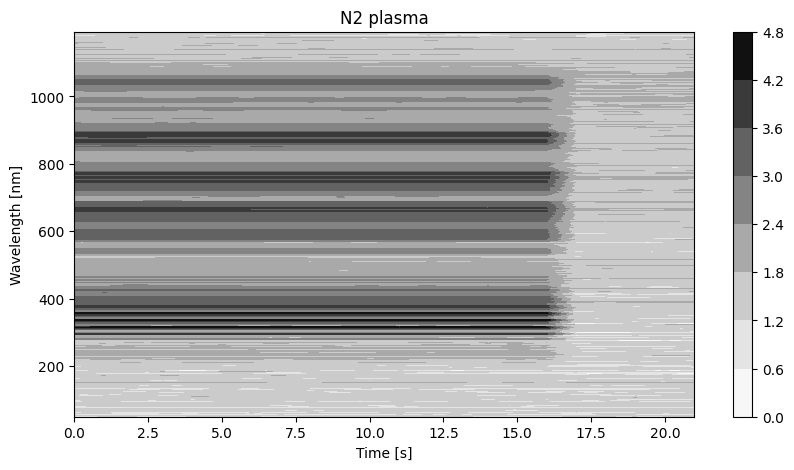

In [4]:
# scaling to plot intensity of  N2 and NH3 plasma
x_N2 = N2.index.tolist()
mm = MinMaxScaler()
mm.fit(np.array(N2_log.columns).reshape(-1, 1))
y_N2 = mm.transform(np.array(N2_log.columns).reshape(-1, 1)).flatten() * 1142 + 50

X_N2, Y_N2 = np.meshgrid(x_N2, y_N2)
Z_N2 = N2_log.T

plt.figure(figsize=(10,5))
plt.contourf(X_N2, Y_N2, Z_N2, cmap='Greys')
plt.xlabel('Time [s]')
plt.ylabel('Wavelength [nm]')
# plt.ylim(200,1100) # OES measurable spectral range
plt.title('N2 plasma')
plt.colorbar()
plt.show()

In [5]:
# extract a max value
N2_log['336.66'].idxmax()

12

In [6]:
print(N2.iloc[12,:].max(), N2_log.iloc[12,:].max())

40618.0 4.608718535259142


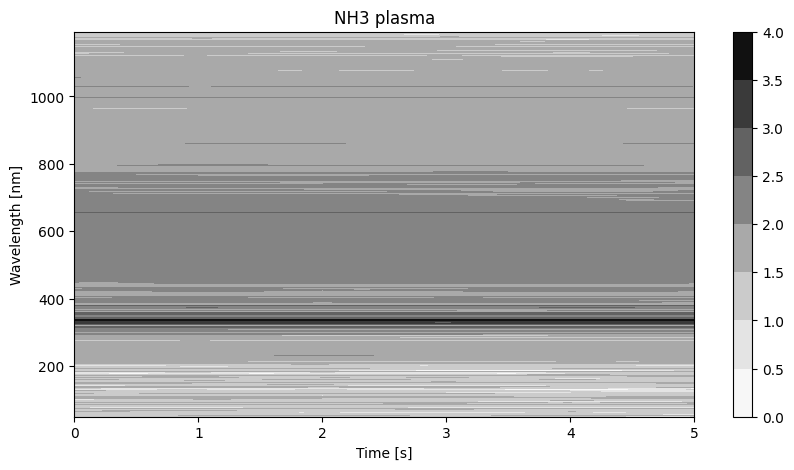

In [7]:
x_NH3 = NH3.index.tolist()
mm = MinMaxScaler()
mm.fit(np.array(NH3_log.columns).reshape(-1, 1))
y_NH3 = mm.transform(np.array(NH3_log.columns).reshape(-1, 1)).flatten() * 1142 + 50

X_NH3, Y_NH3 = np.meshgrid(x_NH3, y_NH3)
Z_NH3 = NH3_log.T

plt.figure(figsize=(10,5))
plt.contourf(X_NH3, Y_NH3, Z_NH3, cmap='Greys')
plt.xlabel('Time [s]')
plt.ylabel('Wavelength [nm]')
# plt.ylim(200,1100) # OES measurable spectral range
plt.title('NH3 plasma')
plt.colorbar()
plt.show()

In [8]:
# extract a max value
NH3_log['336.13'].idxmax()

3

In [9]:
print(NH3.iloc[3,:].max(), NH3_log.iloc[3,:].max())

5908.0 3.771440486639912


In [23]:
# wavelength scaling
mm = MinMaxScaler()
mm.fit(np.array(N2_log.columns).reshape(-1, 1))
x = mm.transform(np.array(N2_log.columns).reshape(-1, 1)).flatten() * 1142.08 + 49.75

# extract data to plot
N2 = N2.iloc[:15,:].values
N2_log = N2_log.iloc[:15,:].values
p4_N2 = p4_N2.iloc[1].values
p4_N2_log = p4_N2_log.iloc[1].values

# extract data to plot
NH3 = NH3.iloc[:3,:].values
NH3_log = NH3_log.iloc[:3,:].values
p3_NH3 = p3_NH3.iloc[1].values
p3_NH3_log = p3_NH3_log.iloc[1].values

# intensity scaling
# N2
N2_scaled = []
for elem in N2:
    mm = MinMaxScaler()
    mm.fit(np.array(elem).reshape(-1, 1))
    N2_scaled.append(mm.transform(np.array(elem).reshape(-1, 1)).flatten())

N2_log_scaled = []
for elem in N2_log:
    mm = MinMaxScaler()
    mm.fit(np.array(elem).reshape(-1, 1))
    N2_log_scaled.append(mm.transform(np.array(elem).reshape(-1, 1)).flatten())

mm = MinMaxScaler()
mm.fit(np.array(p4_N2).reshape(-1, 1))
p4_N2_scaled = mm.transform(np.array(p4_N2).reshape(-1, 1)).flatten()

mm = MinMaxScaler()
mm.fit(np.array(p4_N2_log).reshape(-1, 1))
p4_N2_log_scaled = mm.transform(np.array(p4_N2_log).reshape(-1, 1)).flatten()

# NH3
NH3_scaled = []
for elem in NH3:
    mm = MinMaxScaler()
    mm.fit(np.array(elem).reshape(-1, 1))
    NH3_scaled.append(mm.transform(np.array(elem).reshape(-1, 1)).flatten())

NH3_log_scaled = []
for elem in NH3_log:
    mm = MinMaxScaler()
    mm.fit(np.array(elem).reshape(-1, 1))
    NH3_log_scaled.append(mm.transform(np.array(elem).reshape(-1, 1)).flatten())

mm = MinMaxScaler()
mm.fit(np.array(p3_NH3).reshape(-1, 1))
p3_NH3_scaled = mm.transform(np.array(p3_NH3).reshape(-1, 1)).flatten()

mm = MinMaxScaler()
mm.fit(np.array(p3_NH3_log).reshape(-1, 1))
p3_NH3_log_scaled = mm.transform(np.array(p3_NH3_log).reshape(-1, 1)).flatten()

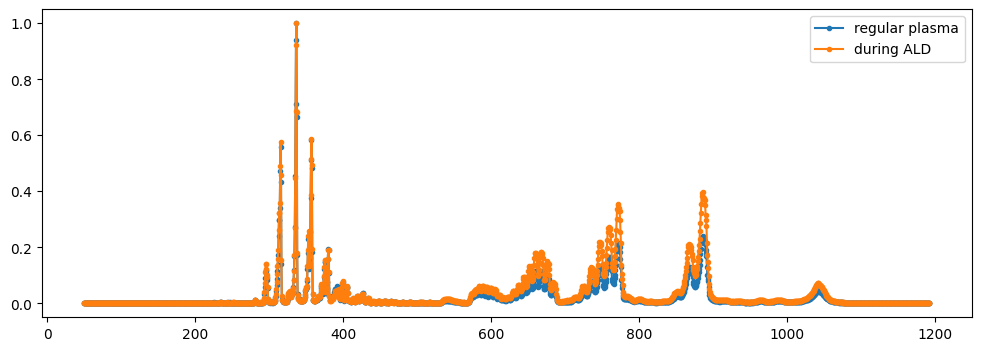

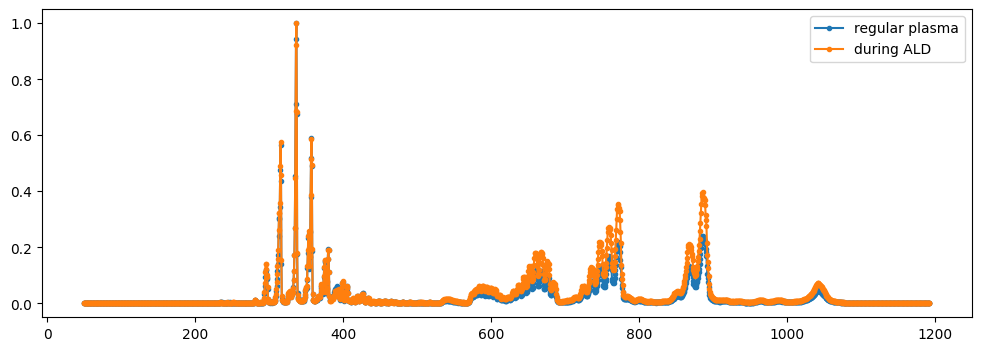

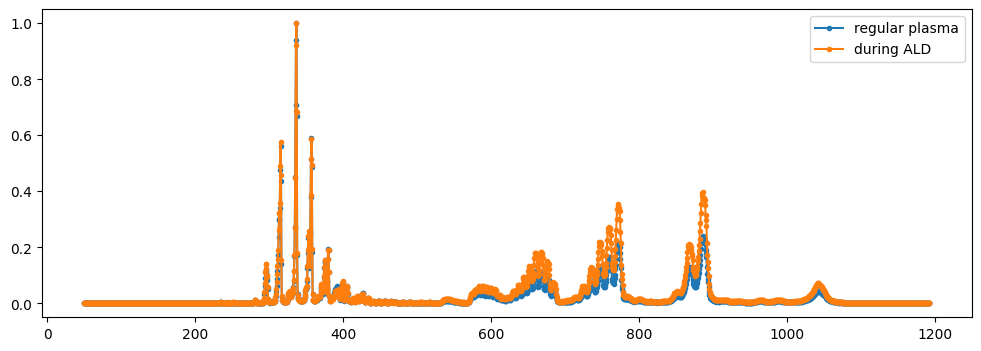

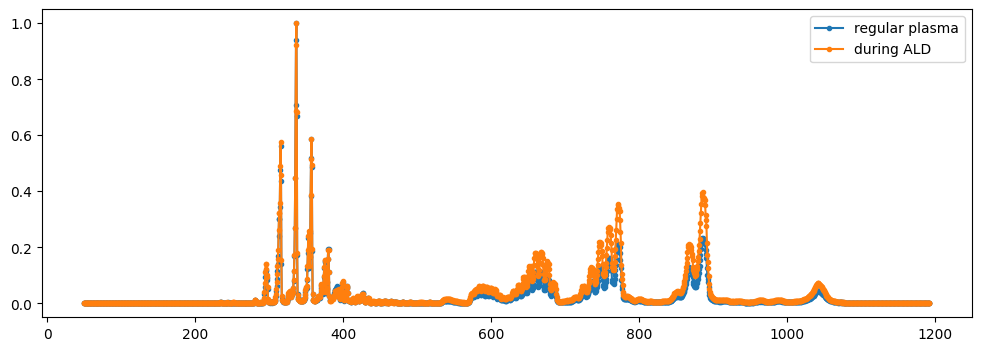

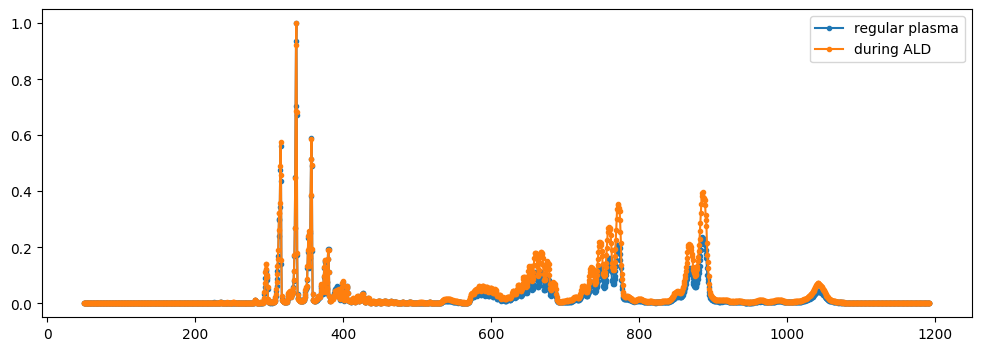

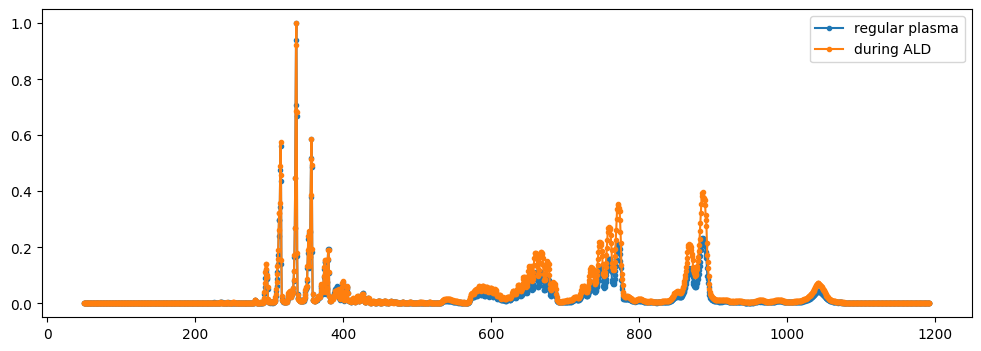

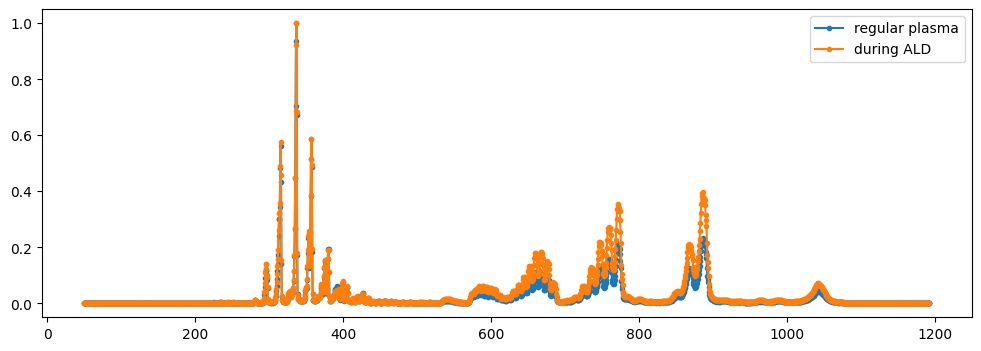

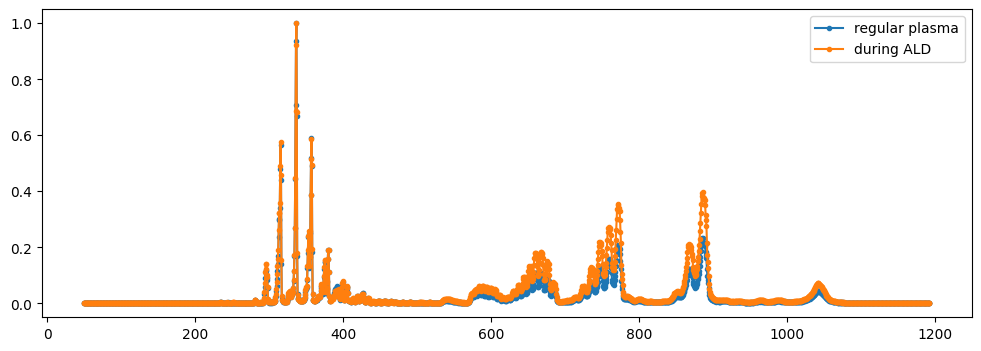

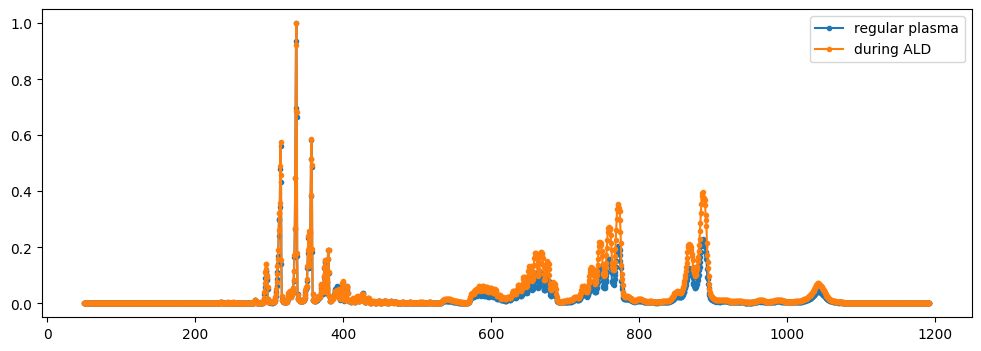

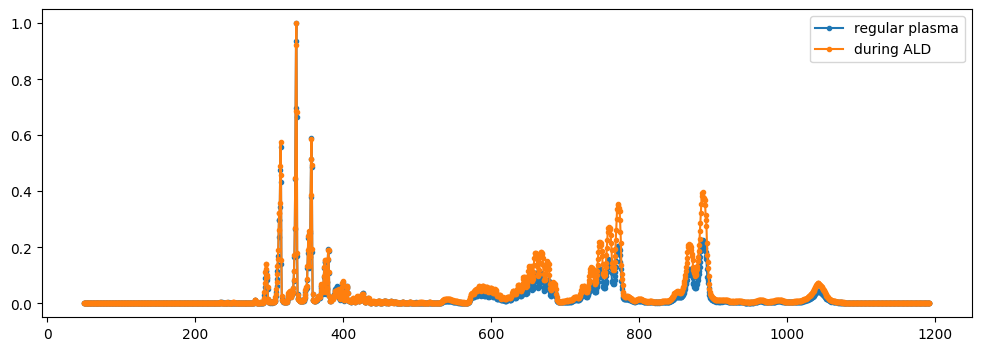

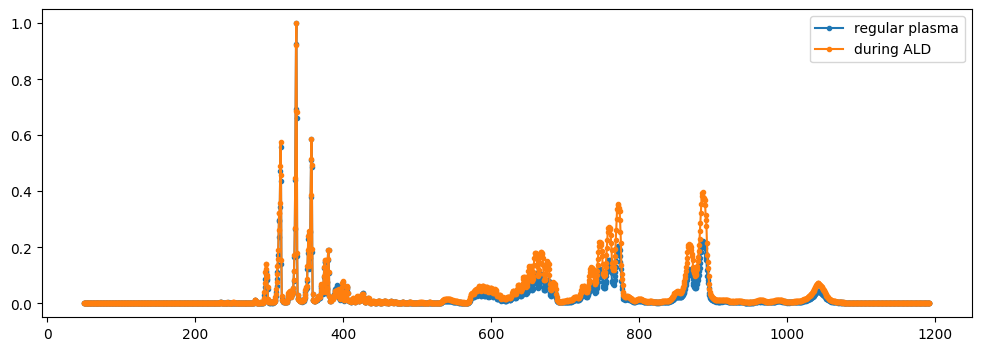

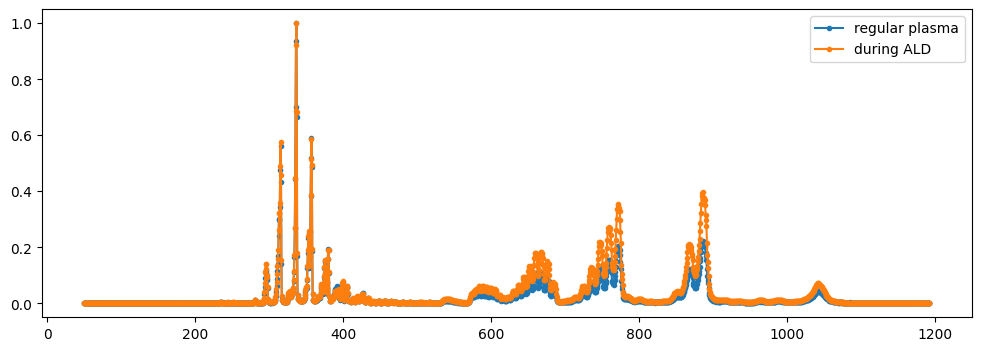

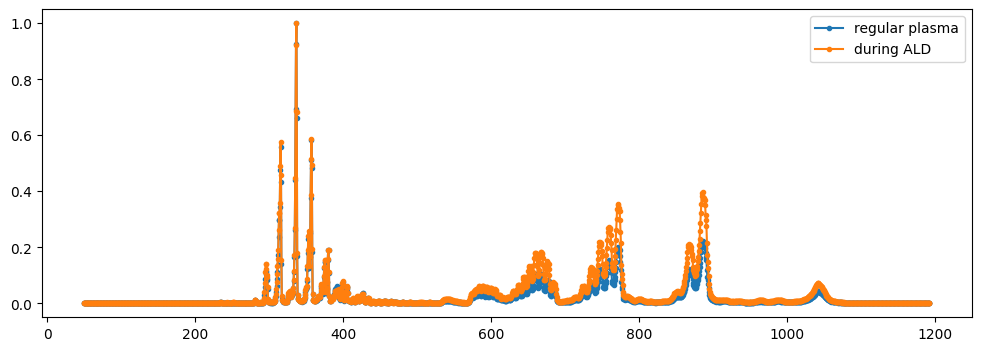

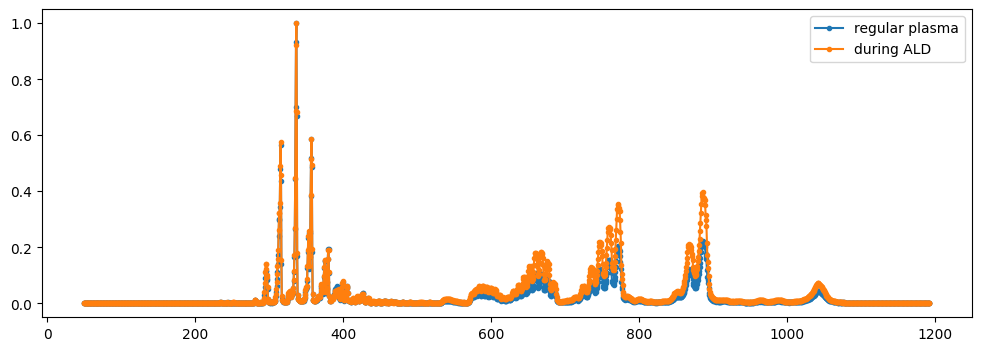

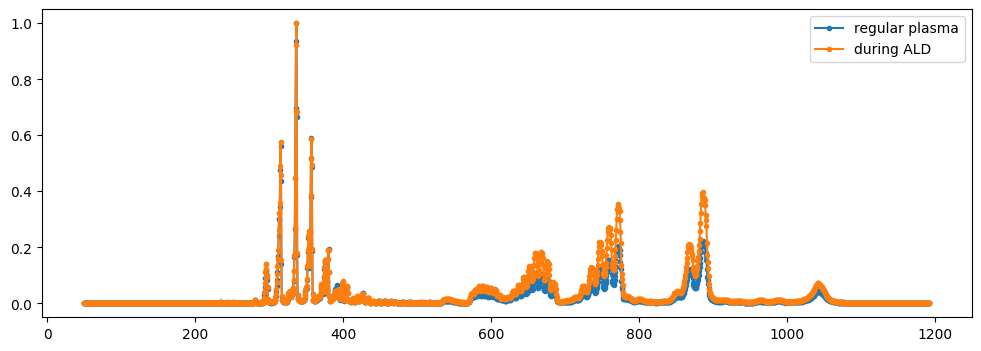

In [24]:
# plot together
for i in range(len(N2_scaled)):
    plt.figure(figsize=(12,4))
    plt.plot(x,N2_scaled[i], '.-')
    plt.plot(x,p4_N2_scaled, '.-')
    plt.legend(['regular plasma','during ALD'])
    plt.show()

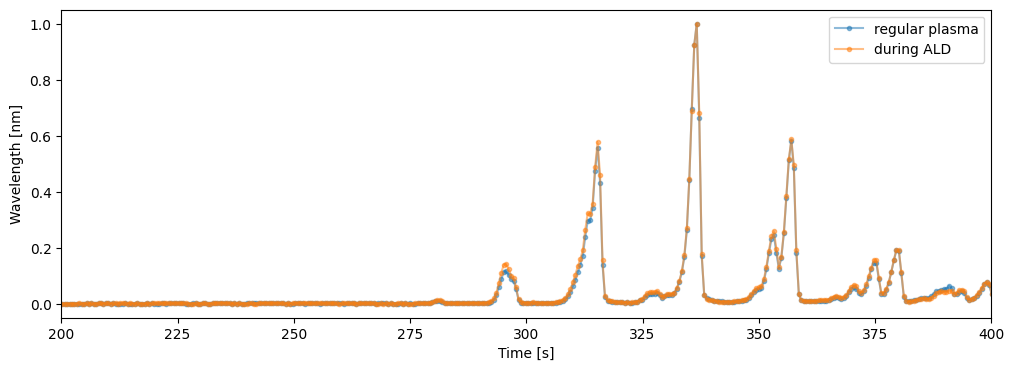

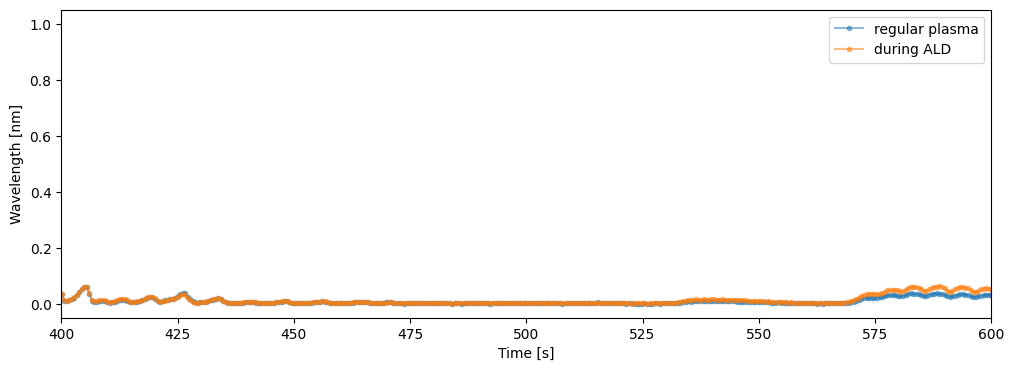

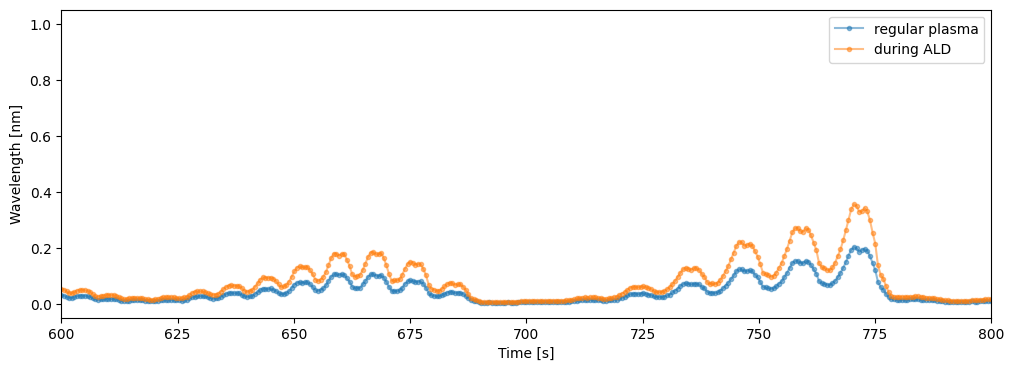

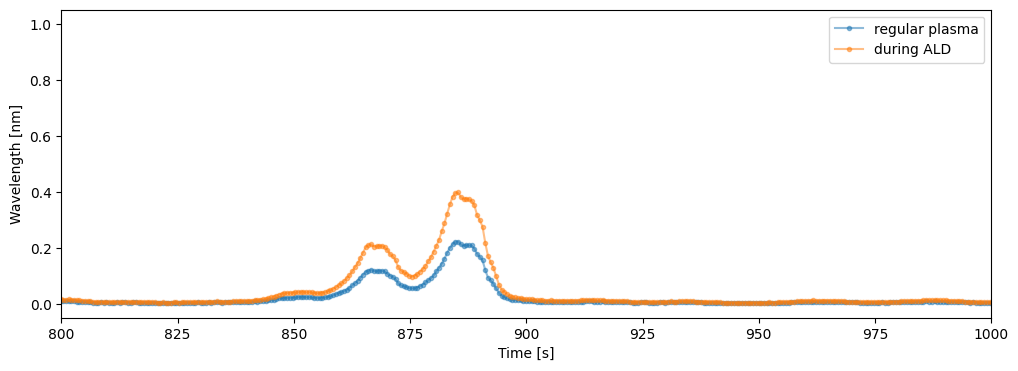

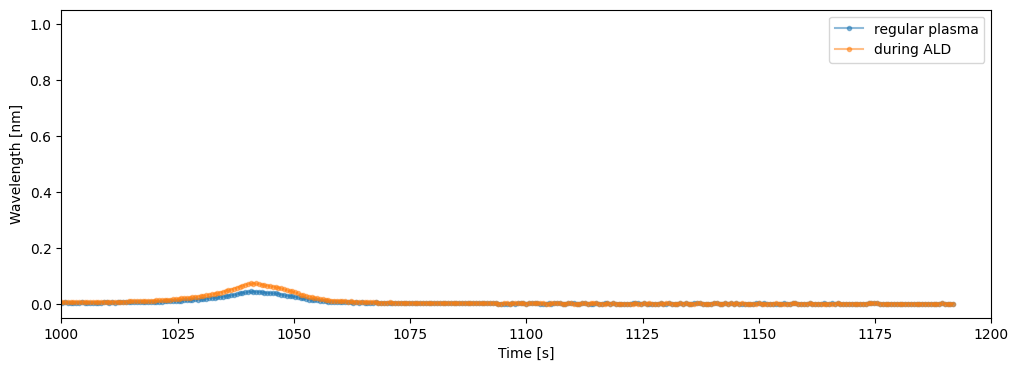

In [25]:
for i in range(1,6):
    plt.figure(figsize=(12,4))
    plt.plot(x,N2_scaled[12], '.-',alpha=0.5)
    plt.plot(x,p4_N2_scaled, '.-',alpha=0.5)
    plt.xlim(200*i,200*(i+1))
    plt.xlabel('Time [s]')
    plt.ylabel('Wavelength [nm]')
    plt.legend(['regular plasma','during ALD'])
    plt.show()

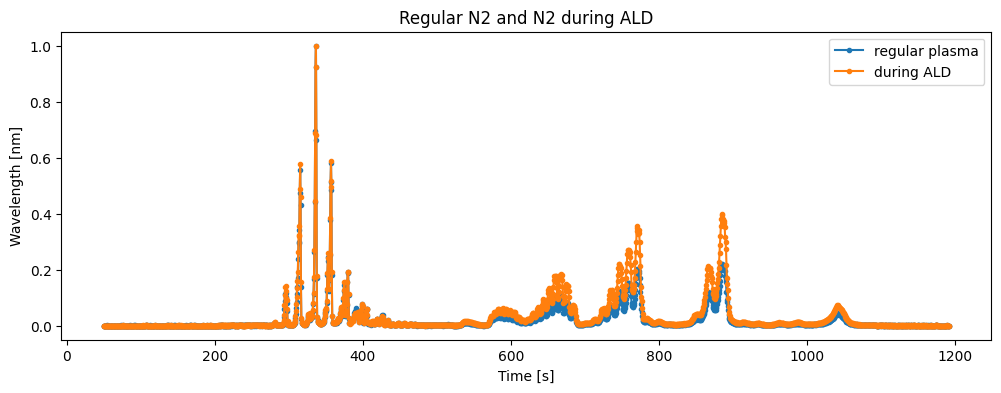

In [26]:
plt.figure(figsize=(12,4))
plt.plot(x,N2_scaled[12], '.-')
plt.plot(x,p4_N2_scaled, '.-')
plt.legend(['regular plasma','during ALD'])
plt.xlabel('Time [s]')
plt.ylabel('Wavelength [nm]')
plt.title('Regular N2 and N2 during ALD')
plt.show()

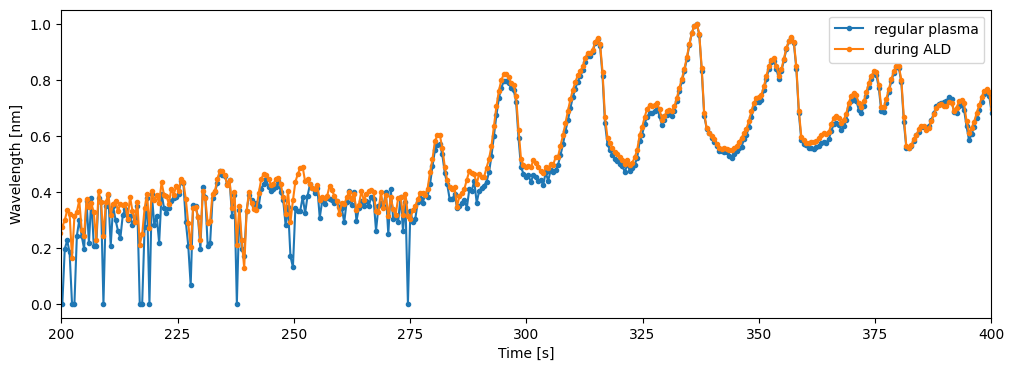

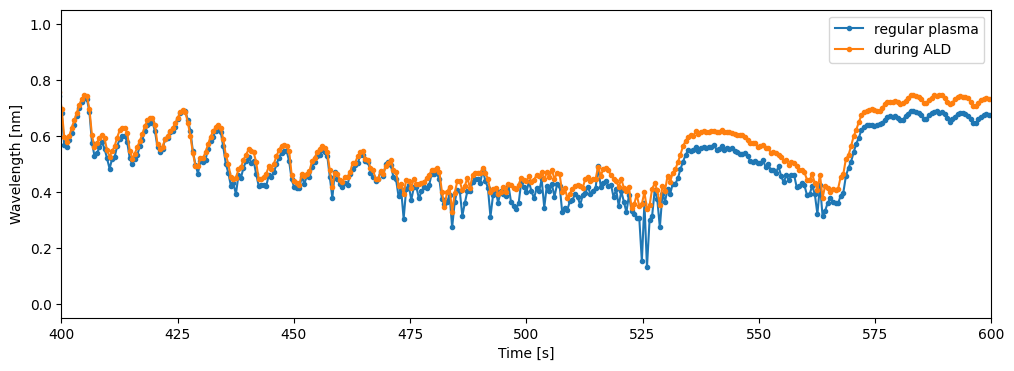

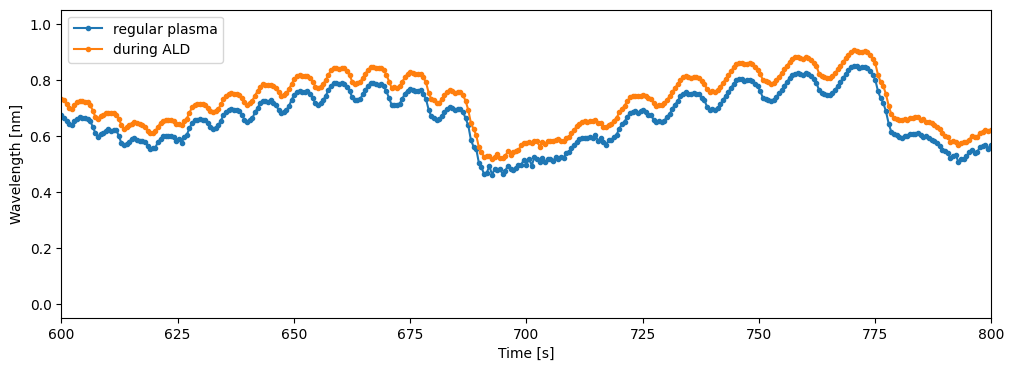

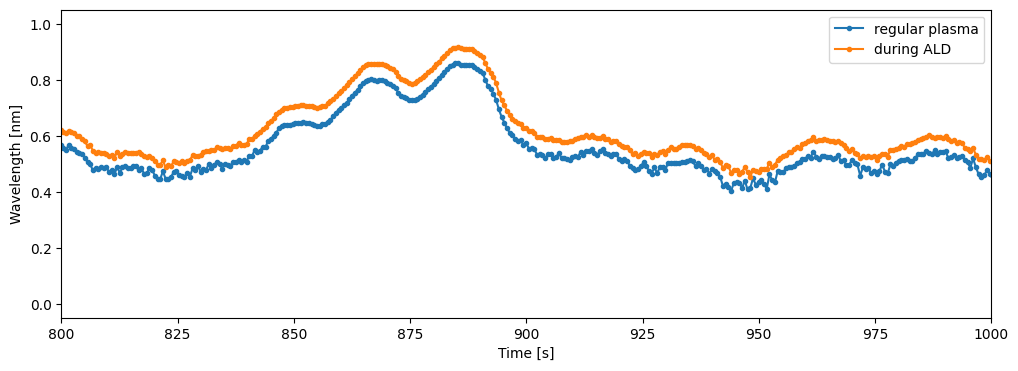

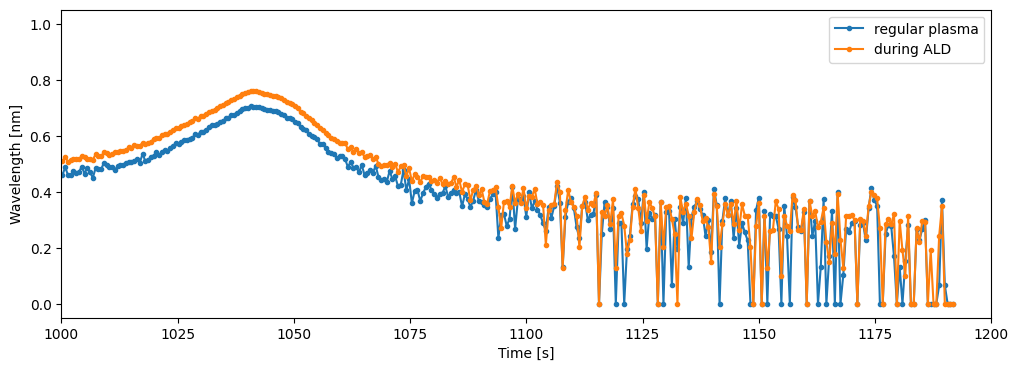

In [27]:
for i in range(1,6):
    plt.figure(figsize=(12,4))
    plt.plot(x,N2_log_scaled[12], '.-')
    plt.plot(x,p4_N2_log_scaled, '.-')
    plt.xlim(200*i,200*(i+1))
    plt.xlabel('Time [s]')
    plt.ylabel('Wavelength [nm]')
    plt.legend(['regular plasma','during ALD'])
    plt.show()

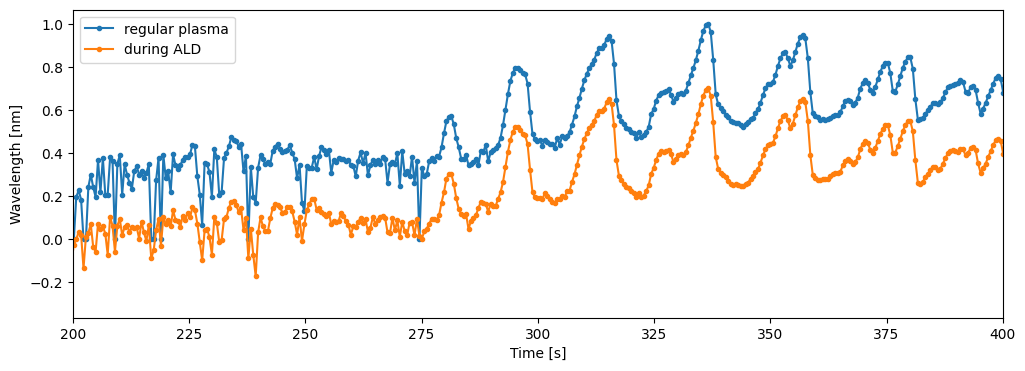

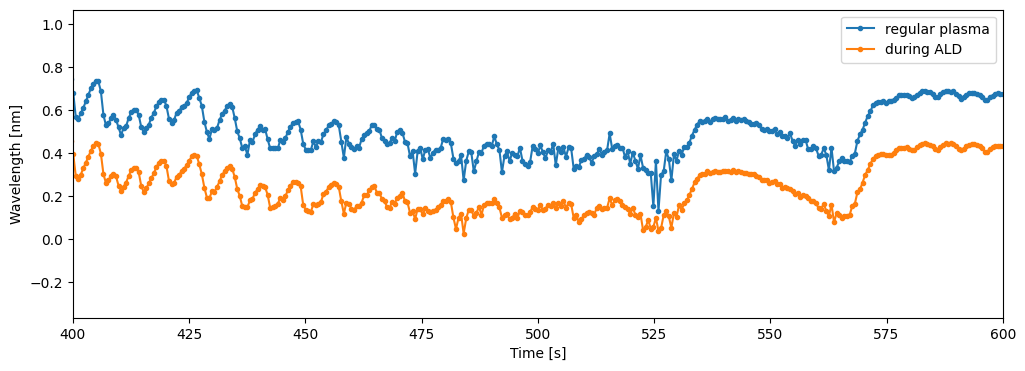

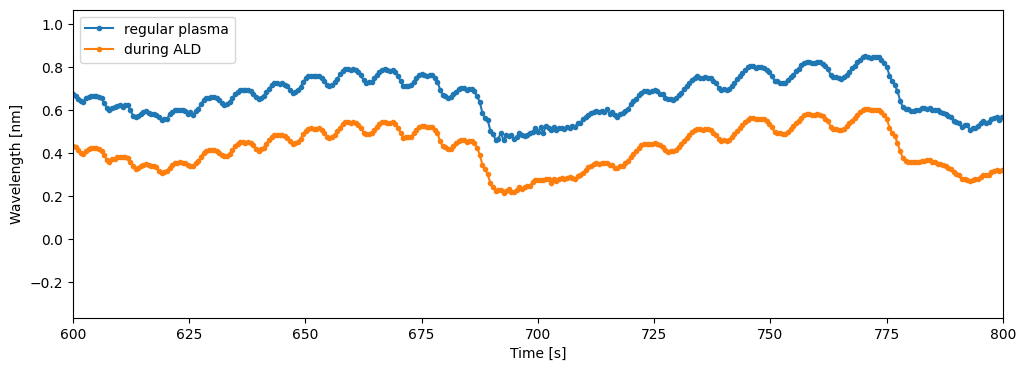

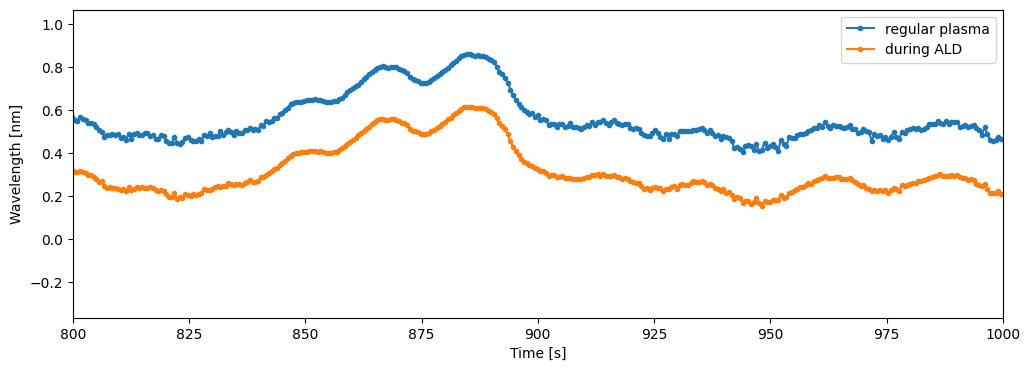

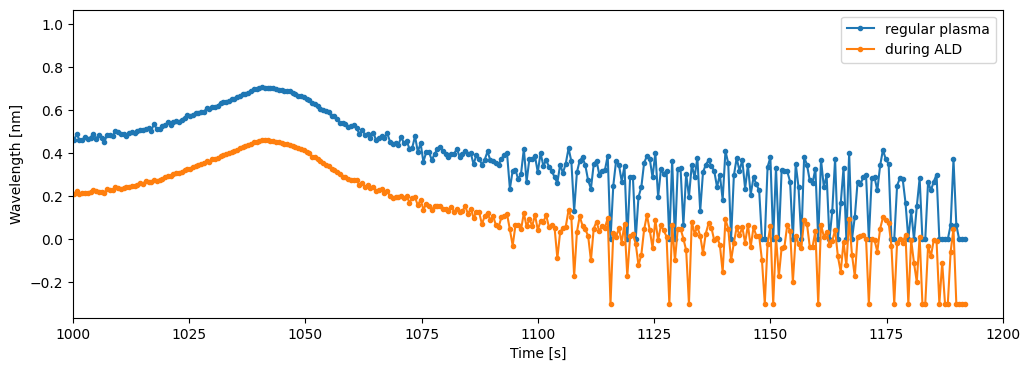

In [28]:
for i in range(1,6):
    plt.figure(figsize=(12,4))
    plt.plot(x,N2_log_scaled[12], '.-')
    plt.plot(x,p4_N2_log_scaled-0.3, '.-')
    plt.xlim(200*i,200*(i+1))
    plt.xlabel('Time [s]')
    plt.ylabel('Wavelength [nm]')
    plt.legend(['regular plasma','during ALD'])
    plt.show()

In [29]:
# random color generator
import random
random.seed(10)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(10)]

In [38]:
# two interactive plots
# make them interactive
import plotly.graph_objects as go

y1 = N2_log_scaled[12]
y2 = p4_N2_log_scaled+0.5
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y1, mode='lines+markers', name='regular N2'), 
                       go.Scatter(x=x, y=y2, mode='lines+markers', name='during ALD')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[-0.1,2], xaxis_title='Wavelegnth [nm]', 
                  yaxis_title='Intensity [a.u.]', title='Comparison of emission spectrum of regular N2 and N2 during ALD')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)

#1
scatter1 = fig.data[0]
cust_color1 = colors[0]
scatter1.line.color = cust_color1
scatter1.marker.color = [cust_color1] * len(x)
scatter1.marker.size = [4] * len(x)
scatter1.marker.line.color = [cust_color1] * len(x)
scatter1.marker.line.width = [1] * len(x)
#2
scatter2 = fig.data[1]
cust_color2 = colors[1]
scatter2.line.color = cust_color2
scatter2.marker.color = [cust_color2] * len(x)
scatter2.marker.size = [4] * len(x)
scatter2.marker.line.color = [cust_color2] * len(x)
scatter2.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    #1
    c1 = list(scatter1.marker.color)
    s1 = list(scatter1.marker.size)
    for i in points.point_inds:
        c1[i] = colors[2]
        s1[i] = 10
        with fig.batch_update():
            scatter1.marker.color = c1
            scatter1.marker.size = s1
    #2
    c2 = list(scatter2.marker.color)
    s2 = list(scatter2.marker.size)
    for j in points.point_inds:
        c2[j] = colors[3]
        s2[j] = 10
        with fig.batch_update():
            scatter2.marker.color = c2
            scatter2.marker.size = s2
            
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
    
def display_value(trace, points, selector):
    for point in points.point_inds:
        print(point)
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{np.round(x_value,3)}</b>", ax=0, ay=-25, font=dict(size=10))       
def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
# scatter1.on_click(wrapper)
scatter2.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#1DF06E'},
              'marker': {'color': [#1DF06E, #1DF06E, #1DF06E, ..., #1DF06E,
                                   #1DF06E, #1DF06E],
                         'line': {'color': [#1DF06E, #1DF06E, #1DF06E, ...,
                                            #1DF06E, #1DF06E, #1DF06E],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'name': 'regular N2',
              'type': 'scatter',
              'uid': '5e6147b8-f834-4a1d-a6ce-c2a804cc2a3f',
              'x': array([  49.75      ,   50.24999562,   50.74999124, ..., 1190.61001068,
                          1191.22000534, 1191.83      ]),
              'y': array([0.        , 0.        , 0.20705159, ..., 0.        , 0.        ,
                          0.        ])},
             {'line': {'color': '#F851FA'},
              'marker': {'color': [#F851F

In [160]:
# two interactive plots
# make them interactive
import plotly.graph_objects as go

y1 = N2_log_scaled[12]
y2 = p4_N2_log_scaled+0.5
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y1, mode='lines+markers', name='regular N2'), 
                       go.Scatter(x=x, y=y2, mode='lines+markers', name='during ALD')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[-0.1,2], xaxis_title='Wavelegnth [nm]', 
                  yaxis_title='Log intensity [a.u.]', title='Comparison of emission spectrum of regular N2 and N2 during ALD')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
#1
scatter1 = fig.data[0]
cust_color1 = colors[0]
scatter1.line.color = cust_color1
scatter1.marker.color = [cust_color1] * len(x)
scatter1.marker.size = [4] * len(x)
scatter1.marker.line.color = [cust_color1] * len(x)
scatter1.marker.line.width = [1] * len(x)
#2
scatter2 = fig.data[1]
cust_color2 = colors[1]
scatter2.line.color = cust_color2
scatter2.marker.color = [cust_color2] * len(x)
scatter2.marker.size = [4] * len(x)
scatter2.marker.line.color = [cust_color2] * len(x)
scatter2.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    #1
    c1 = list(scatter1.marker.color)
    s1 = list(scatter1.marker.size)
    for i in points.point_inds:
        c1[i] = colors[2]
        s1[i] = 10
        with fig.batch_update():
            scatter1.marker.color = c1
            scatter1.marker.size = s1
    #2
    c2 = list(scatter2.marker.color)
    s2 = list(scatter2.marker.size)
    for i in points.point_inds:
        c2[i] = colors[3]
        s2[i] = 10
        with fig.batch_update():
            scatter2.marker.color = c2
            scatter2.marker.size = s2
            
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
    
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))
        
def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#1DF06E'},
              'marker': {'color': [#1DF06E, #1DF06E, #1DF06E, ..., #1DF06E,
                                   #1DF06E, #1DF06E],
                         'line': {'color': [#1DF06E, #1DF06E, #1DF06E, ...,
                                            #1DF06E, #1DF06E, #1DF06E],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'name': 'regular N2',
              'type': 'scatter',
              'uid': '2dd4b6e4-1b95-407d-b953-370fb9a9c0fa',
              'x': array([  49.75      ,   50.24999562,   50.74999124, ..., 1190.61001068,
                          1191.22000534, 1191.83      ]),
              'y': array([0.        , 0.        , 0.00022158, ..., 0.        , 0.        ,
                          0.        ])},
             {'line': {'color': '#F851FA'},
              'marker': {'color': [#F851F

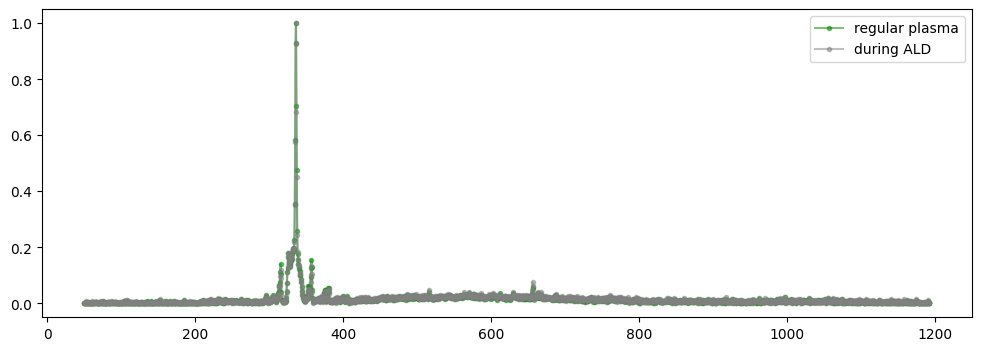

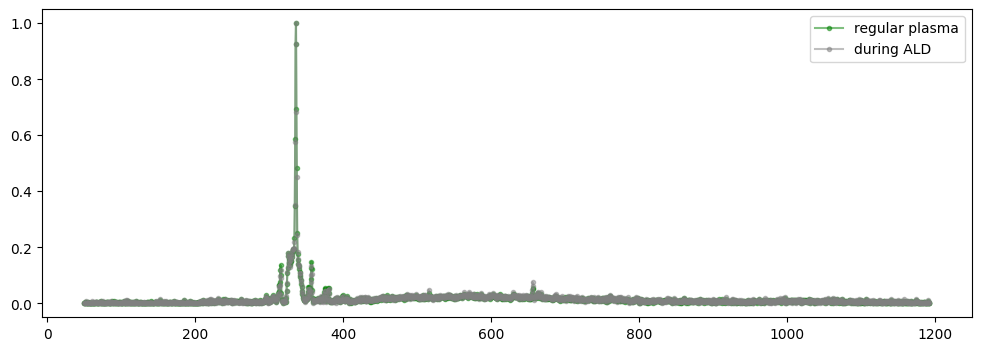

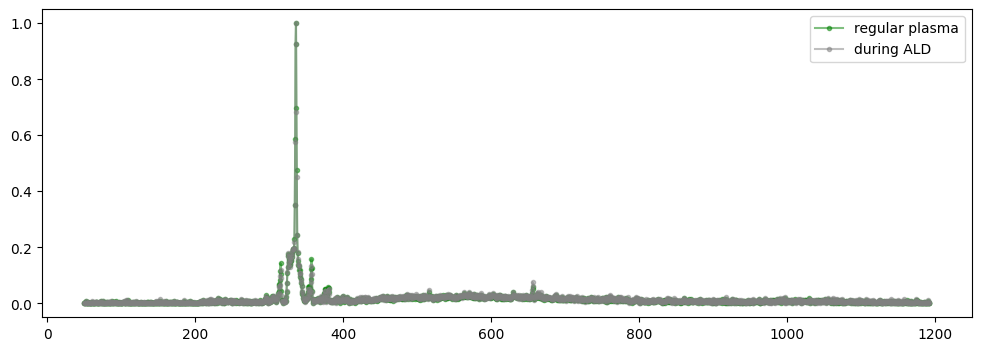

In [124]:
# plot together
for i in range(len(NH3_scaled)):
    plt.figure(figsize=(12,4))
    plt.plot(x,NH3_scaled[i], '.-', color='green',alpha=0.5)
    plt.plot(x,p3_NH3_scaled, '.-',color='gray',alpha=0.5)
    plt.legend(['regular plasma','during ALD'])
    plt.show()

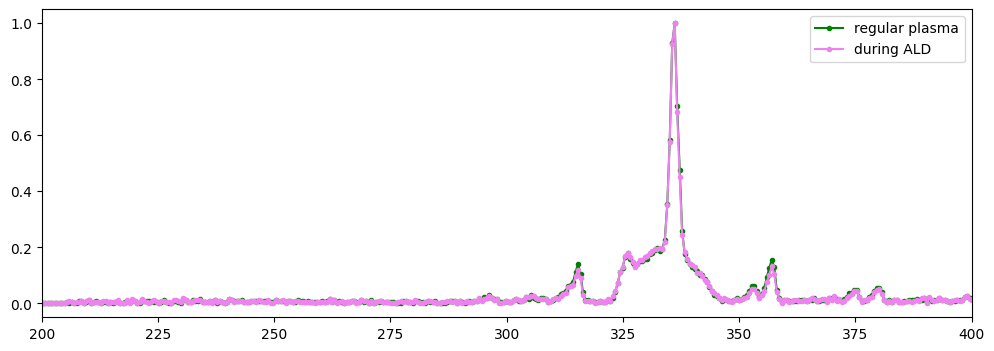

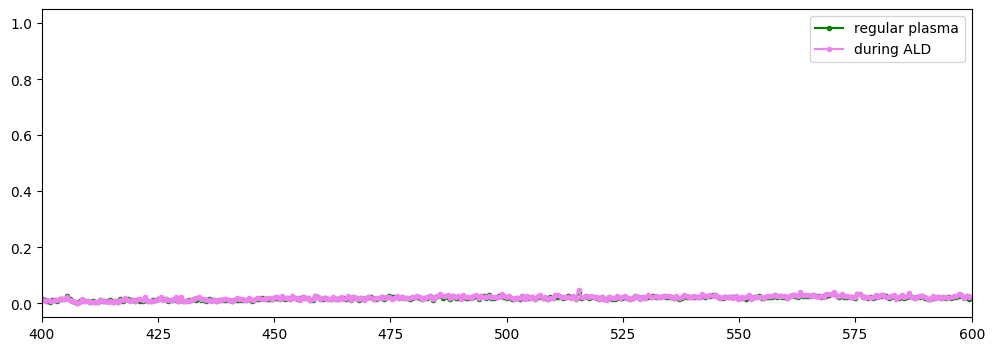

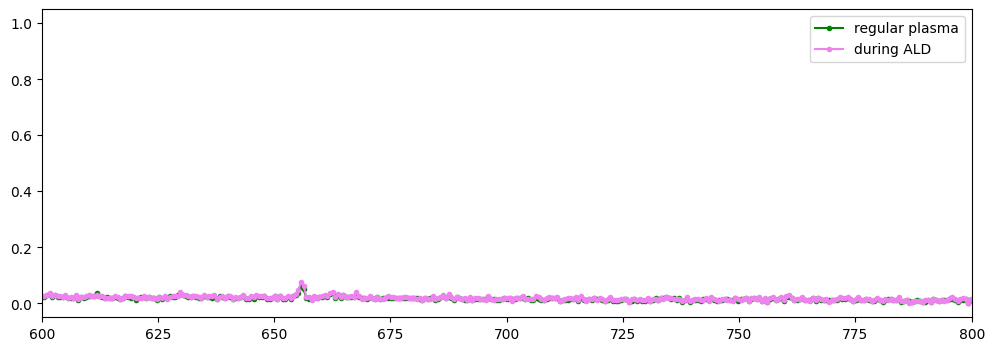

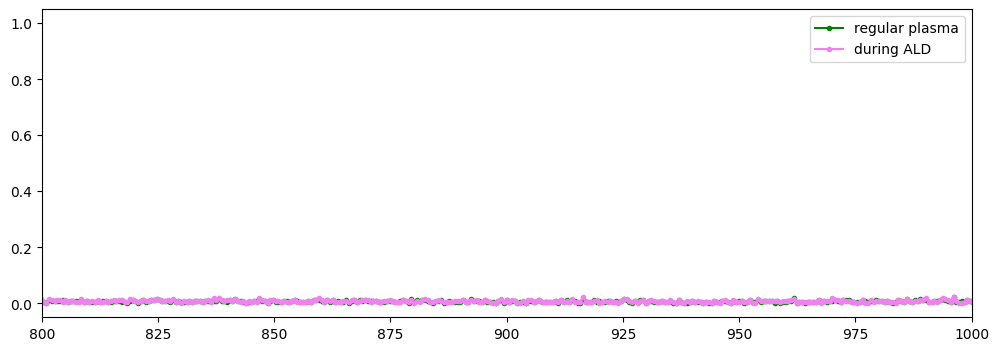

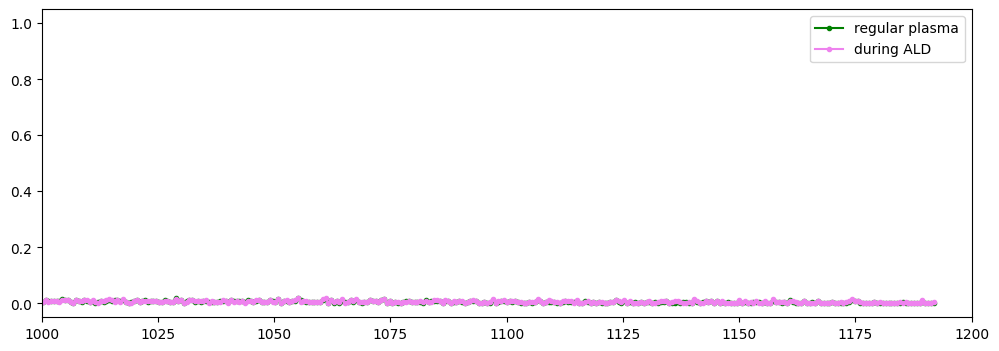

In [39]:
for i in range(1,6):
    plt.figure(figsize=(12,4))
    plt.plot(x,NH3_scaled[0], '.-', color='green')
    plt.plot(x,p3_NH3_scaled, '.-',color='violet')
    plt.xlim(200*i,200*(i+1))
    plt.legend(['regular plasma','during ALD'])
    plt.show()

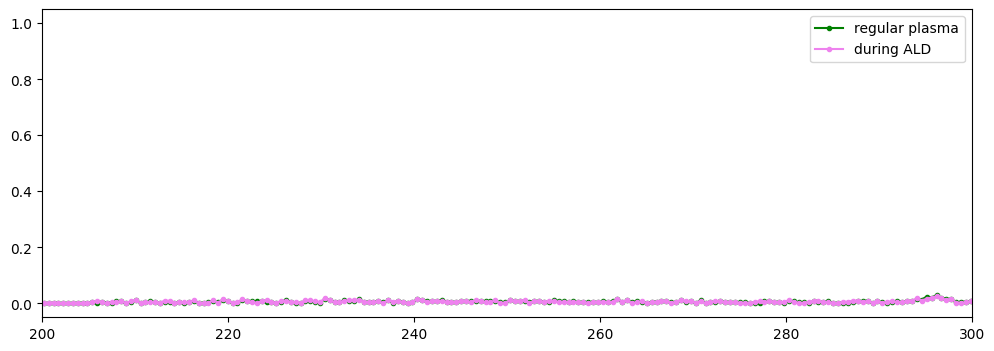

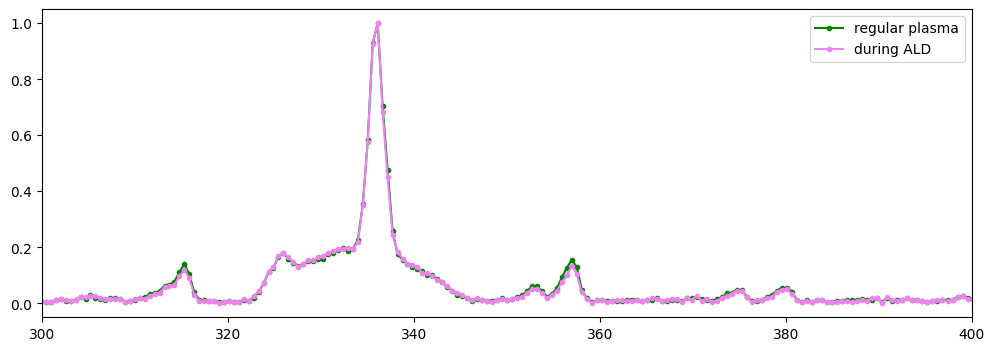

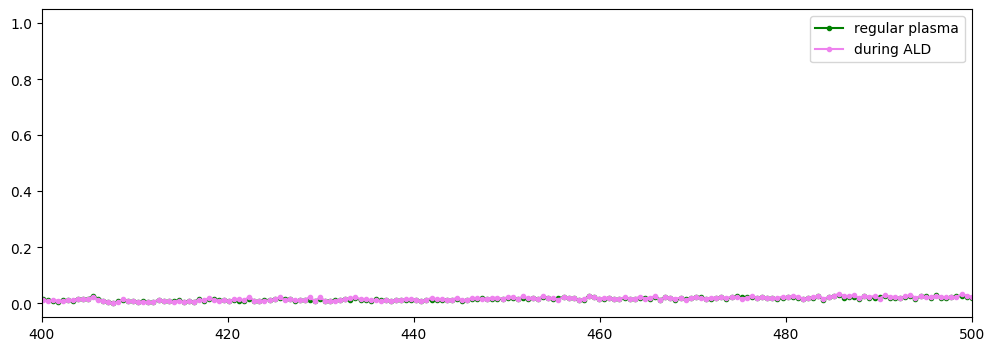

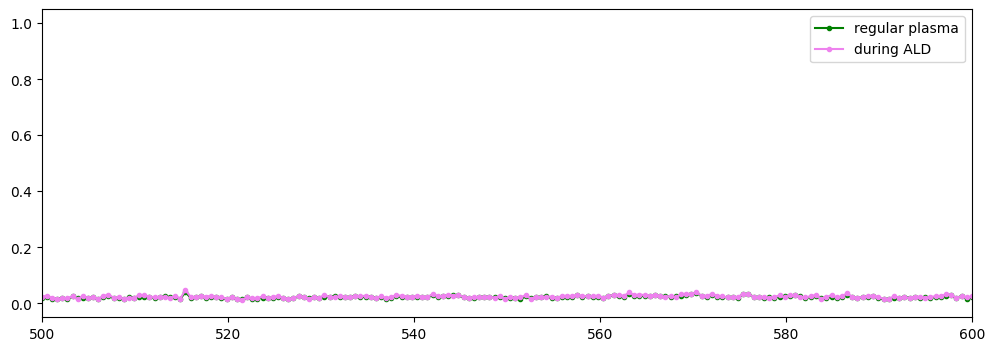

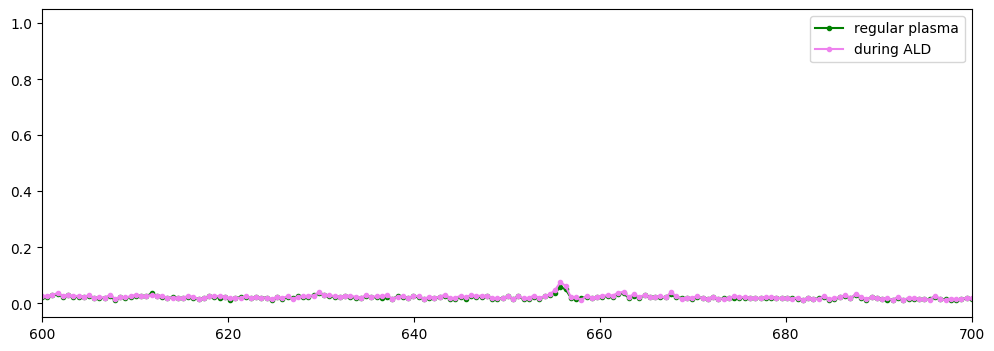

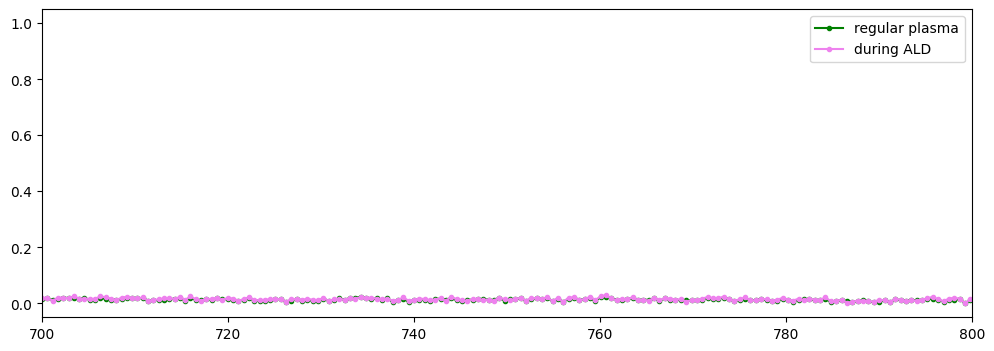

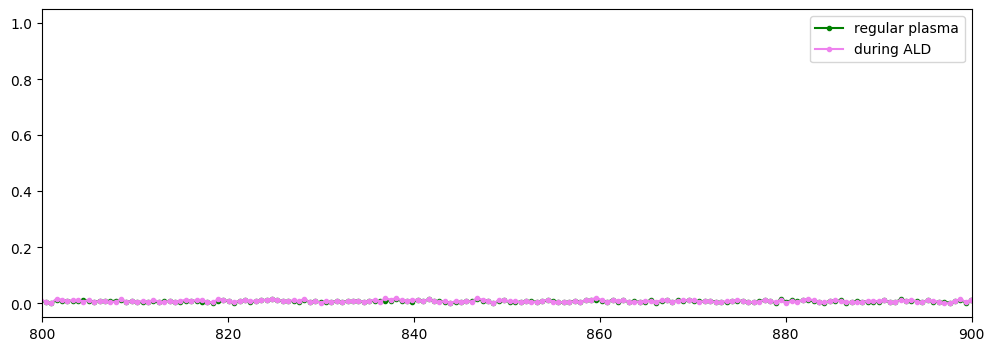

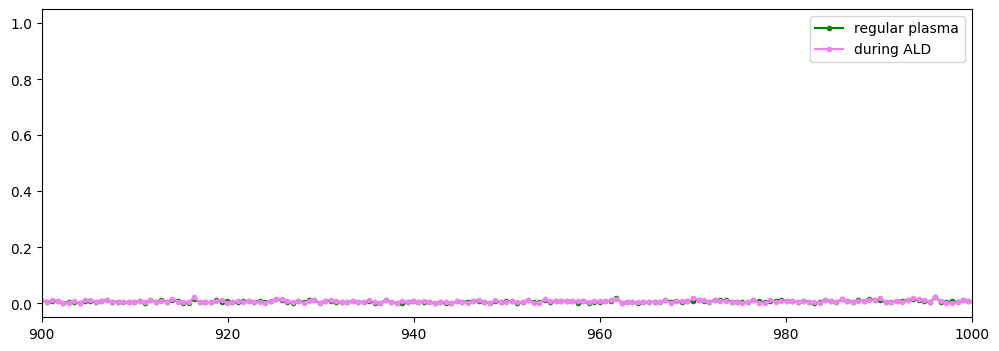

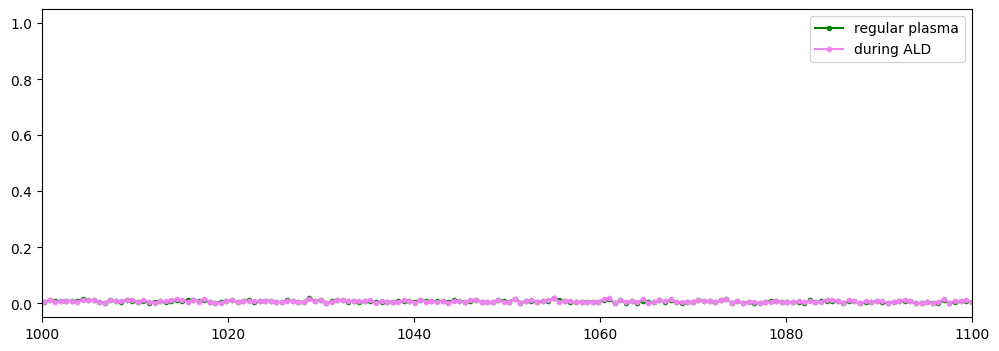

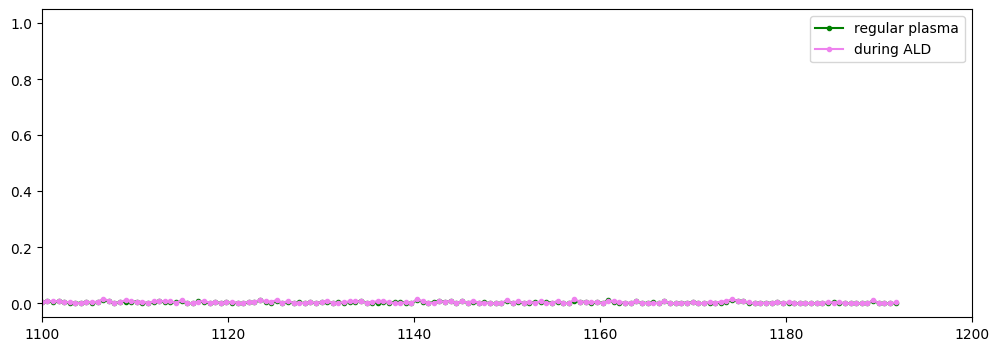

In [42]:
for i in range(1,11):
    plt.figure(figsize=(12,4))
    plt.plot(x,NH3_scaled[0], '.-', color='green')
    plt.plot(x,p3_NH3_scaled, '.-',color='violet')
    plt.xlim(100*(i+1),100*(i+2))
    plt.legend(['regular plasma','during ALD'])
    plt.show()

In [51]:
# two interactive plots
# make them interactive
import plotly.graph_objects as go

y1 = NH3_log_scaled[0]
y2 = p3_NH3_log_scaled+0.5
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y1, mode='lines+markers', name='regular NH3'), 
                       go.Scatter(x=x, y=y2, mode='lines+markers', name='during ALD')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[-0.1,2], xaxis_title='Wavelegnth [nm]', 
                  yaxis_title='Log intensity [a.u.]', title='Comparison of emission spectrum of regular NH3 and NH3 during ALD')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
#1
scatter1 = fig.data[0]
cust_color1 = colors[4]
scatter1.line.color = cust_color1
scatter1.marker.color = [cust_color1] * len(x)
scatter1.marker.size = [4] * len(x)
scatter1.marker.line.color = [cust_color1] * len(x)
scatter1.marker.line.width = [1] * len(x)
#2
scatter2 = fig.data[1]
cust_color2 = colors[5]
scatter2.line.color = cust_color2
scatter2.marker.color = [cust_color2] * len(x)
scatter2.marker.size = [4] * len(x)
scatter2.marker.line.color = [cust_color2] * len(x)
scatter2.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    #1
    c1 = list(scatter1.marker.color)
    s1 = list(scatter1.marker.size)
    for i in points.point_inds:
        c1[i] = colors[2]
        s1[i] = 10
        with fig.batch_update():
            scatter1.marker.color = c1
            scatter1.marker.size = s1
    #2
    c2 = list(scatter2.marker.color)
    s2 = list(scatter2.marker.size)
    for i in points.point_inds:
        c2[i] = colors[3]
        s2[i] = 10
        with fig.batch_update():
            scatter2.marker.color = c2
            scatter2.marker.size = s2
            
def store_value(trace, points, selector):
    global clicked
    clicked.append([np.round(points.__dict__['_xs'][0],3), np.round(points.__dict__['_ys'][0],3)])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
    
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{np.round(x_value,3)}</b>", ax=0, ay=-25, font=dict(size=10))
        
def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
# scatter1.on_click(wrapper)
scatter2.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#59B4E7'},
              'marker': {'color': [#59B4E7, #59B4E7, #59B4E7, #59B4E7, #59B4E7,
                                   #59B4E7, #59B4E7, #59B4E7, #59B4E7, #59B4E7,
                                   #59B4E7, #59B4E7, #59B4E7, #59B4E7, #59B4E7,
                                   #59B4E7, #59B4E7, #59B4E7, #59B4E7, #59B4E7,
                                   #59B4E7, #59B4E7, #59B4E7, #59B4E7, #59B4E7,
                                   #59B4E7, #59B4E7, #59B4E7, #59B4E7, #59B4E7,
                                   #59B4E7, #59B4E7, #59B4E7, #59B4E7, #59B4E7,
                                   #59B4E7, #59B4E7, #59B4E7, #59B4E7, #59B4E7],
                         'line': {'color': [#59B4E7, #59B4E7, #59B4E7, #59B4E7,
                                            #59B4E7, #59B4E7, #59B4E7, #59B4E7,
                                            #59B4E7, #59B4E7, #59B4E7, #59B4E7,
                                            #59B4E7, #59B4E7

In [47]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'wavelength[nm]':x, 'intensity [a.u.]':y})
df_clicked = df_clicked.sort_values(by='wavelength[nm]', ascending=True)
df_clicked.to_csv('plasma/NH3_log.csv', index=False)

C:\Users\syj43\AppData\Local\Temp\ipykernel_14860\3626024992.py:2: RuntimeWarning:

divide by zero encountered in log10

C:\Users\syj43\AppData\Local\Temp\ipykernel_14860\3626024992.py:3: RuntimeWarning:

divide by zero encountered in log10



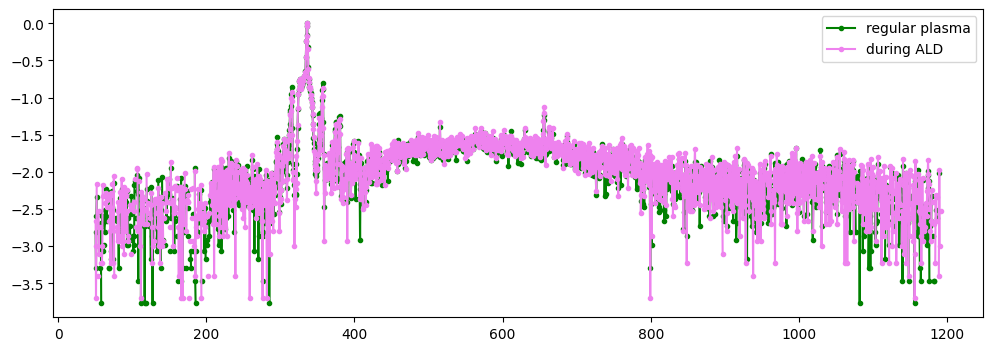

In [40]:
plt.figure(figsize=(12,4))
plt.plot(x,np.log10(NH3_scaled[0]), '.-', color='green')
plt.plot(x,np.log10(p3_NH3_scaled), '.-',color='violet')
plt.legend(['regular plasma','during ALD'])
plt.show()

C:\Users\syj43\AppData\Local\Temp\ipykernel_14860\2430574716.py:3: RuntimeWarning:

divide by zero encountered in log10

C:\Users\syj43\AppData\Local\Temp\ipykernel_14860\2430574716.py:4: RuntimeWarning:

divide by zero encountered in log10



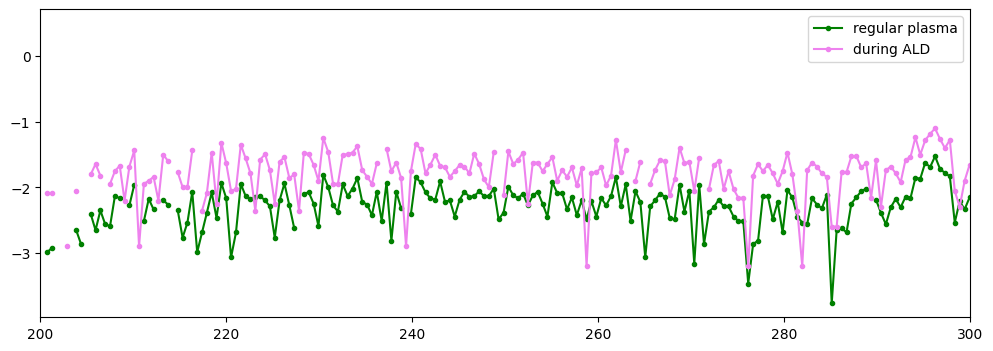

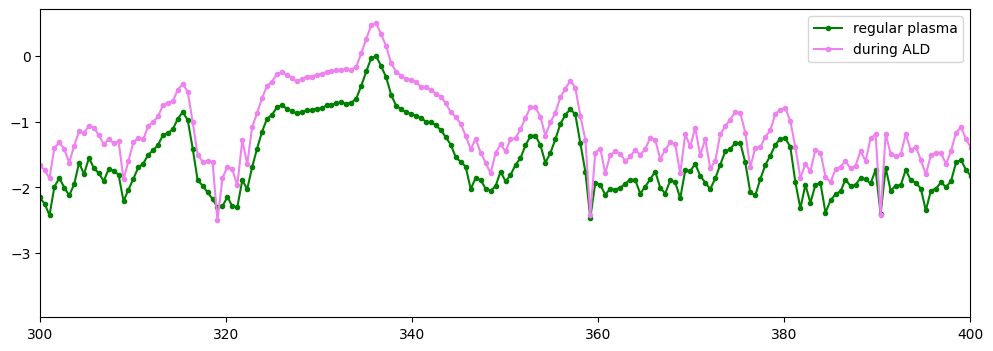

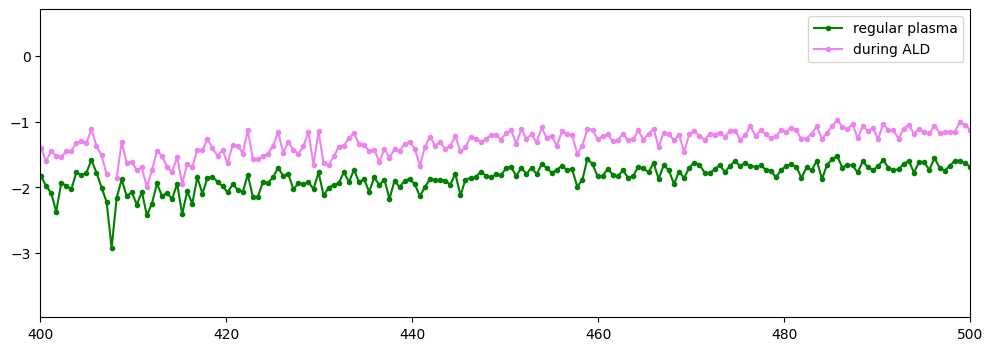

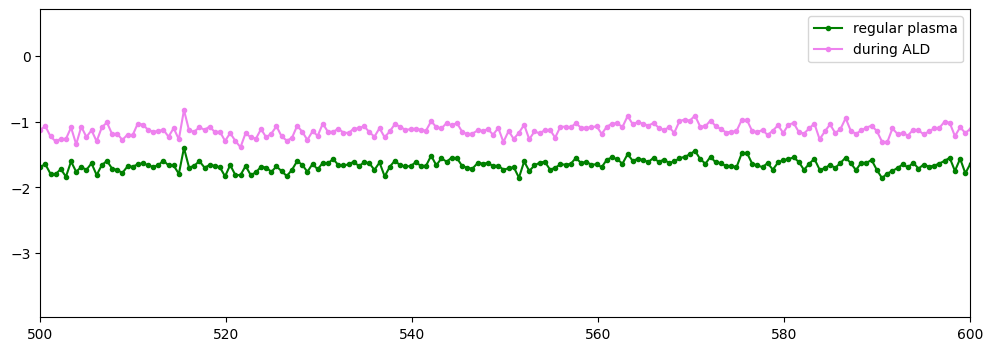

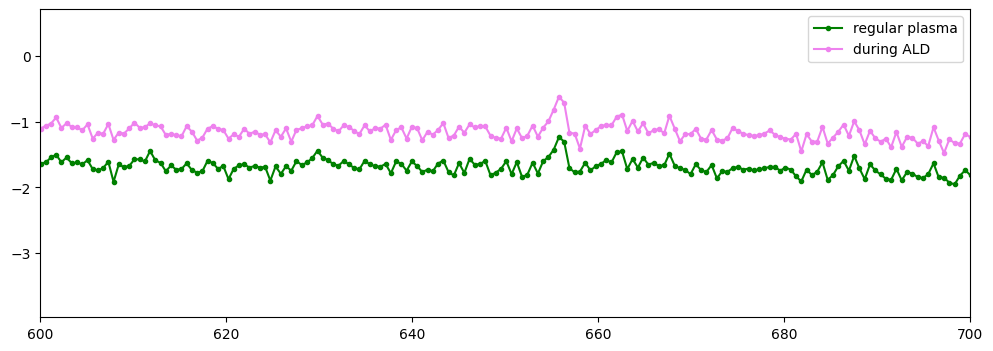

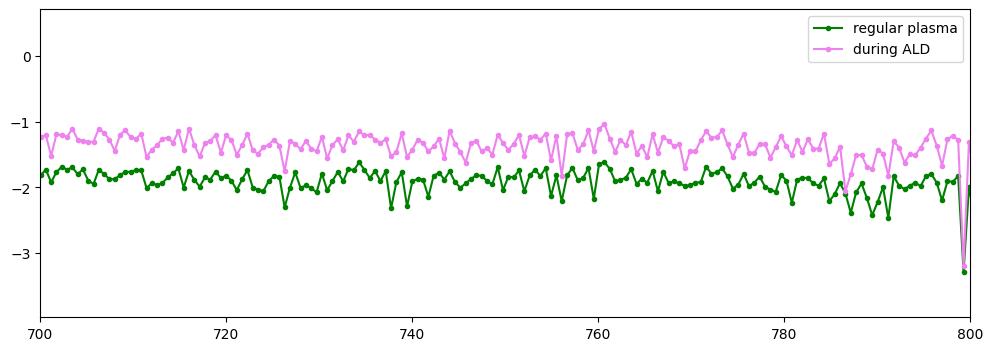

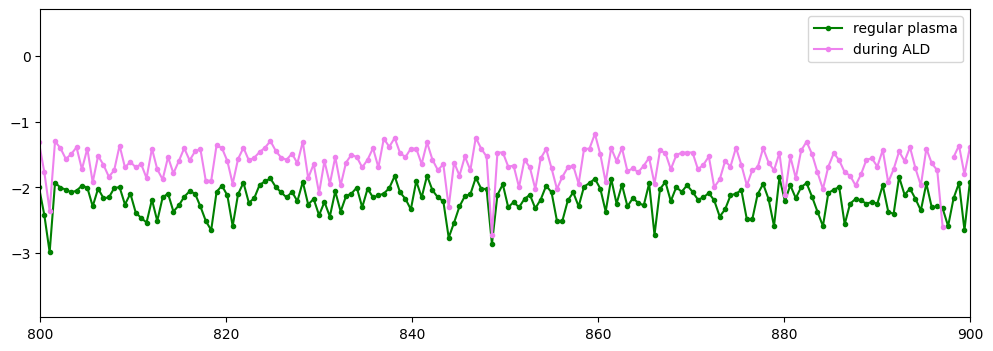

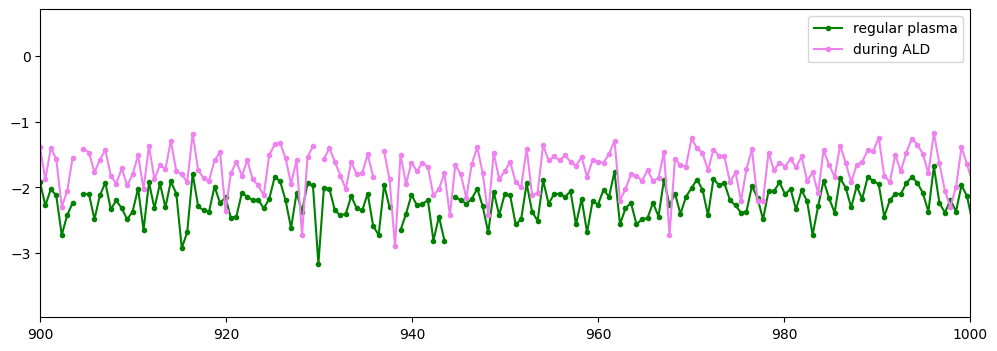

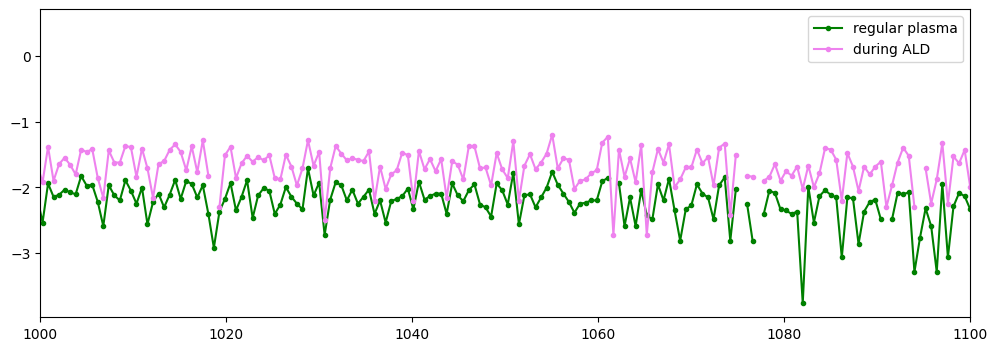

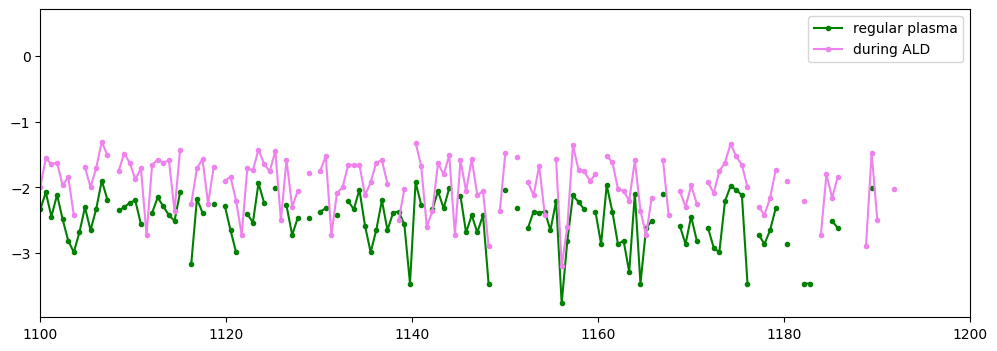

In [41]:
for i in range(1,11):
    plt.figure(figsize=(12,4))
    plt.plot(x,np.log10(NH3_scaled[0]), '.-', color='green')
    plt.plot(x,np.log10(p3_NH3_scaled)+0.5, '.-',color='violet')
    plt.xlim(100*(i+1),100*(i+2))
    plt.legend(['regular plasma','during ALD'])
    plt.show()

In [137]:
# random color generator
import random
random.seed(10)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(8)]

In [145]:
# two interactive plots
# make them interactive
import plotly.graph_objects as go

y1 = np.log10(NH3_scaled[0])
y2 = np.log10(p3_NH3_scaled)+0.5
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y1, mode='lines+markers', name='regular NH3'), 
                       go.Scatter(x=x, y=y2, mode='lines+markers', name='during ALD')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,400], yaxis_range=[-4,1], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Process #1; NH3 intensity during the 40th cycle')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
cust_color = colors[0]
scatter.line.color = cust_color
scatter.marker.color = [cust_color] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [cust_color] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = colors[5]
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
            
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

C:\Users\syj43\AppData\Local\Temp\ipykernel_8896\1580052712.py:5: RuntimeWarning:

divide by zero encountered in log10

C:\Users\syj43\AppData\Local\Temp\ipykernel_8896\1580052712.py:6: RuntimeWarning:

divide by zero encountered in log10



FigureWidget({
    'data': [{'line': {'color': '#1DF06E'},
              'marker': {'color': [#1DF06E, #1DF06E, #1DF06E, ..., #1DF06E,
                                   #1DF06E, #1DF06E],
                         'line': {'color': [#1DF06E, #1DF06E, #1DF06E, ...,
                                            #1DF06E, #1DF06E, #1DF06E],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'name': 'regular NH3',
              'type': 'scatter',
              'uid': '536e2b96-cfb8-4cf0-95e6-e0d3c59da5a4',
              'x': array([  49.75      ,   50.24999562,   50.74999124, ..., 1190.61001068,
                          1191.22000534, 1191.83      ]),
              'y': array([       -inf,        -inf, -2.81395145, ...,        -inf,        -inf,
                                 -inf])},
             {'mode': 'lines+markers',
              'name': 'during ALD',
   